## This worksheet will be used to showcase:
1. Missing Values Handling
2. Create Custom Function
3. Use of Iterators
4. Regular Expression(REGEX)

In [58]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [59]:
df_device=pd.read_csv('android_devices.csv')

In [60]:
df_device.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


# Handling Missing Values

In [61]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Retail Branding  14542 non-null  object
 1   Marketing Name   13375 non-null  object
 2   Device           14546 non-null  object
 3   Model            14546 non-null  object
dtypes: object(4)
memory usage: 454.7+ KB


From the above, it can be observed that dataframe columns are of type Object(Non-Integer)

In [62]:
df_device.describe()

,Retail Branding,Marketing Name,Device,Model
count,14542,13375,14546,14546
unique,605,8631,9830,12883
top,Samsung,Galaxy S3,mt5880,LG-P970
freq,1762,38,59,23


In [63]:
df_device.isna().sum()

Retail Branding       4
Marketing Name     1171
Device                0
Model                 0
dtype: int64

From the above data, it can be observed that two columns : 'Retail Branding' and 'Marketing Name' have missing values

<AxesSubplot:>

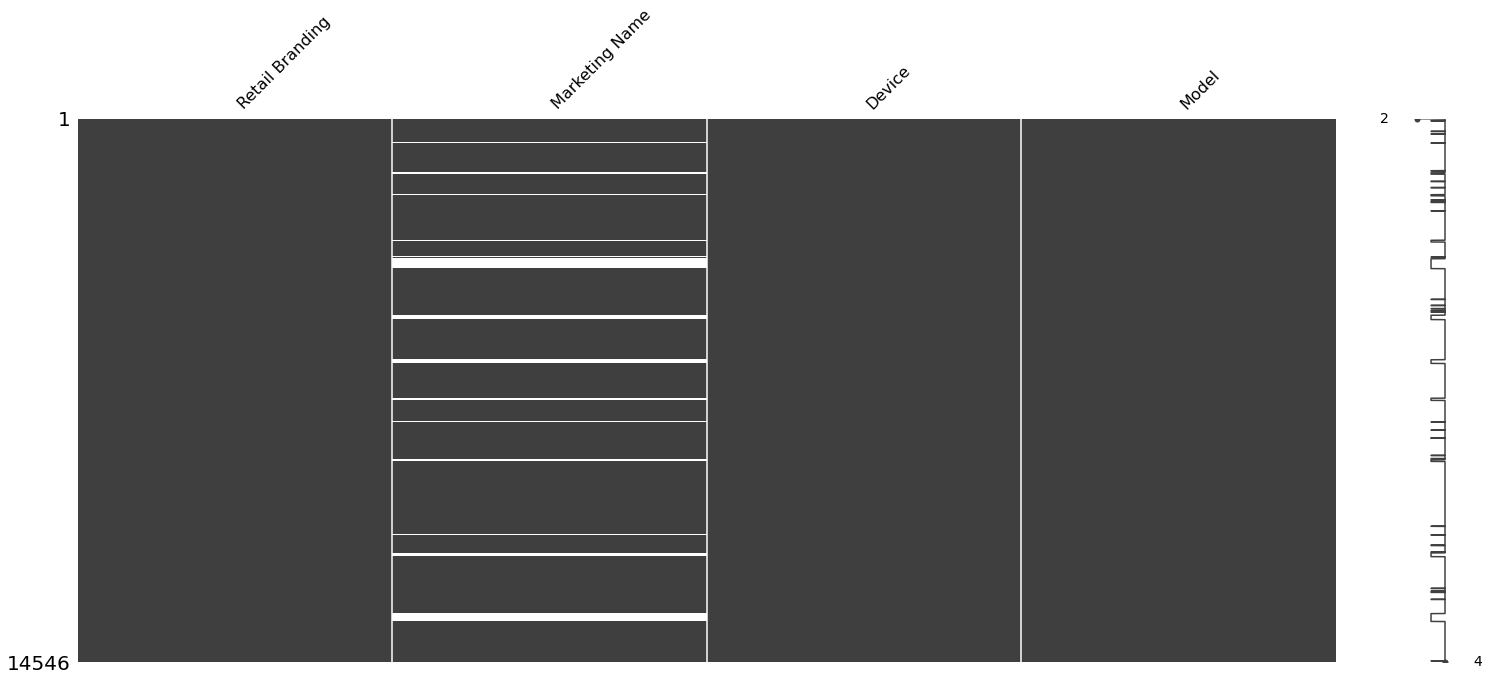

In [64]:
msno.matrix(df_device)

In [65]:
df_missing=df_device[df_device['Marketing Name'].isna()]

In [66]:
df_missing['Retail Branding'].value_counts()

Huawei                                  265
ZTE                                     212
LGE                                     118
TCT (Alcatel)                           101
Lenovo                                  100
Motorola                                 60
Hisense                                  48
Samsung                                  47
Coolpad                                  36
Foxconn                                  32
Sony Ericsson                            19
Acer                                     12
Dell                                     12
Enspert                                   9
Compal                                    8
Sony                                      7
KT Tech                                   6
Quanta                                    6
ViewSonic                                 5
Sharp                                     5
Asus                                      5
HTC                                       5
Intel                           

In [67]:
df_missing.describe()

,Retail Branding,Marketing Name,Device,Model
count,1167,0,1171,1171
unique,43,0,853,1004
top,Huawei,NaN,msm7225,LG-P920
freq,265,NaN,18,16


In [68]:
df_device['Retail Branding'].value_counts()

Samsung          1762
ZTE              1155
Huawei           1057
LGE              1042
TCT (Alcatel)     930
                 ... 
ClickN Kids         1
WeTek               1
LGUplus             1
VT                  1
SENSEIT             1
Name: Retail Branding, Length: 605, dtype: int64

## Use of Custom function and iterators

In [69]:
# Custom Function to handle missing values

def missing_values(frame,col):
    name =[x for x in globals() if globals()[x] is frame][0]  # Use of Iterators to extract the name of DataFrame
    print('Filling missing values for column {0} in Dataframe {1}: '.format(col,name))
    if frame[col].dtypes=='object':
        frame[col]=frame[col].fillna(frame[col].value_counts().index[0])
    print('Number of remaining missing values in column {0} in Dataframe {1} is : {2} '.format(col,name,frame[col].isna().sum()))
    

In [70]:
missing_values(df_device,'Retail Branding')

Filling missing values for column Retail Branding in Dataframe df_device: 
Number of remaining missing values in column Retail Branding in Dataframe df_device is : 0 


In [71]:
missing_values(df_device,'Marketing Name')

Filling missing values for column Marketing Name in Dataframe df_device: 
Number of remaining missing values in column Marketing Name in Dataframe df_device is : 0 


In [72]:
df_device.isna().sum()

Retail Branding    0
Marketing Name     0
Device             0
Model              0
dtype: int64

In [73]:
df_device.head(10)

,Retail Branding,Marketing Name,Device,Model
0,Samsung,Galaxy S3,AD681H,Smartfren Andromax AD681H
1,Samsung,Galaxy S3,FJL21,FJL21
2,Samsung,Galaxy S3,T31,Panasonic T31
3,Samsung,Galaxy S3,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


# Use of REGEX:
<p>The below regex expression searches for a letter/word followed by a space or '-'</p> in column 'Model'
<p>Then it extracts a single letter followed by one or more digit , in parenthesis (), and fill in the values of column 'model_number'</p>
<p> The rows where the above format could not be found are filled with Nan in column 'model_number'</p>

In [74]:
df_device['model_number']=df_device['Model'].str.extract('\w+\W(\w\d+)')

In [75]:
df_device.sample(10)

,Retail Branding,Marketing Name,Device,Model,model_number
6743,Lenovo,Lenovo A8-50,A8-50LC,Lenovo 2 A8-50LC,A8
8400,Panasonic,FZ-X1,FZ-X1VU,FZ-X1,X1
748,Asus,Nexus 7 (2012),tilapia,Nexus 7,NaN
12593,Tecno,TECNO-A7S,TECNO-A7S,TECNO-A7S,A7
3647,Hisense,Sero 7,rk3168,E2171CA,NaN
8015,Nextbook,NXA8LTE116,NXA8LTE116,NXA8LTE116,NaN
11298,Sony,Xperia Z1,C6943,C6943,NaN
5039,Itel,it1355,itel_it1355,itel it1355,NaN
5792,LGE,LG M1,m1ds,LG-K332,K332
2328,Gionee,GN5001S,GiONEE_BBL7332,GN5001S,NaN
